In [1]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import HTML

In [2]:
DATA_PATH = '../data'

TDCX_COLORS = ['#EB1D24', '#FAA41E']
TDCX_CMAP = mpl.colors.LinearSegmentedColormap.from_list("", TDCX_COLORS)
sns.set_palette(sns.color_palette(TDCX_COLORS))

# RPA

## Data Audit

In [3]:
RPA_PATH = os.path.join(DATA_PATH, 'RPA')
files_list = os.listdir(RPA_PATH)
print(f'There are {len(files_list)} files in RPA')

There are 4 files in RPA


In [ ]:
df = {}
for file in tqdm(files_list):
    df[file] = pd.read_excel(os.path.join(RPA_PATH, file))

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

In [ ]:
features = []
ref = []
diff = {}
for key, value in df.items():
    if not ref:
        ref = set(value.columns)
    else:
        diff = ref.symmetric_difference(set(value.columns))
    
    if diff:
        raise('Columns are different')
    
print(f'List of features: {ref}')
print(f'Number of features: {len(ref)}')

There are consistent features across files.

In [9]:
df_rpa = pd.DataFrame()
for key, value in df.items():
    df_rpa = pd.concat([df_rpa, value])

In [21]:
null_percentage = pd.DataFrame(
    (100 * df_rpa.isna().sum() / df_rpa.shape[0]).sort_values(ascending=False),
     columns=['Percentage'])

display(null_percentage)
num_null = len(null_percentage[null_percentage.Percentage != 0])
print(f'Number of features with null values: {num_null}')

Percentage
CO Review Type / BI Microflow Type    6.155468
Microflow                             6.155468
Workflow Group                        6.155468
Workflow                              6.155468
CO Violation Group / BI Policy        0.115068
...                                        ...
Error Category                        0.000000
Ds                                    0.000000
Detection Source                      0.000000
DD Dimension Value 3                  0.000000
FP Incorrect Count                    0.000000

[78 rows x 1 columns]

Number of features with null values: 7


In [29]:
dup = df_rpa.shape[0] - df_rpa.drop_duplicates().shape[0]
print(f'There are {dup} duplicate rows')

There are 633 duplicate rows


## Univariate Analysis

In [73]:
dtypes = df_rpa.dtypes
num_cols = dtypes[~dtypes.isin(['object', 'datetime64[ns]'])]
num_cols = num_cols[num_cols != 'bool'].index.tolist()

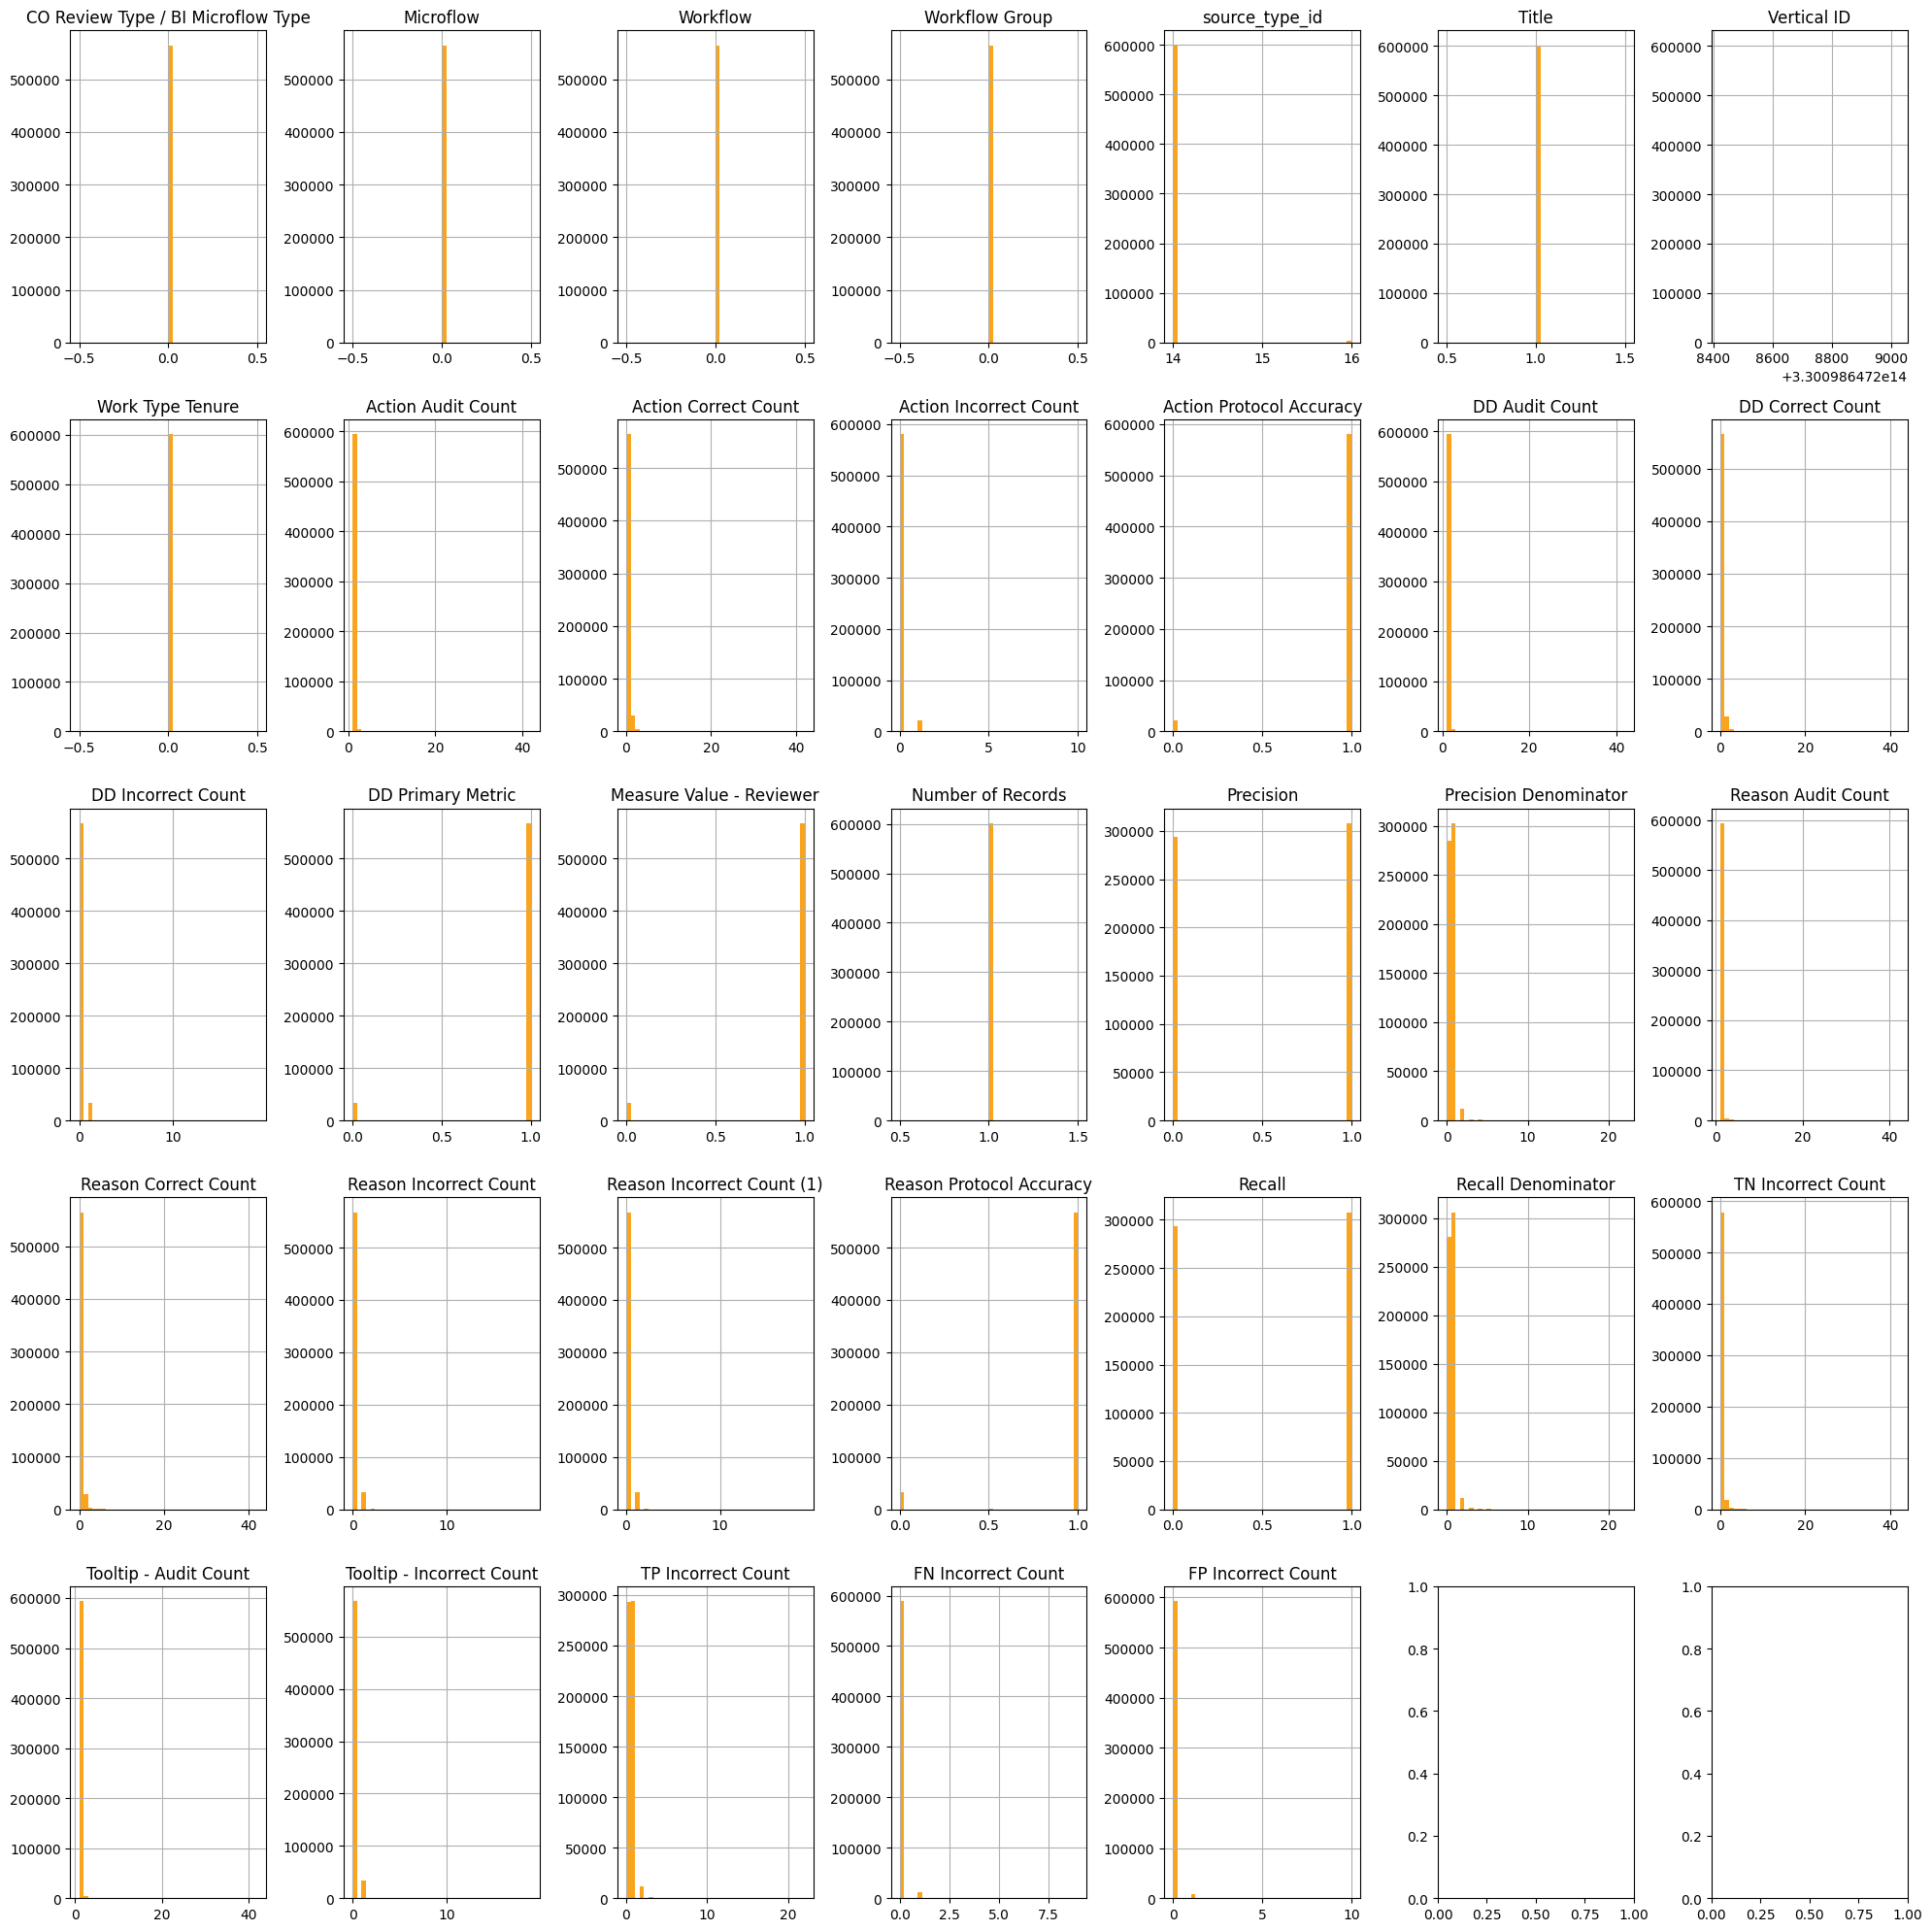

In [108]:
display(HTML('<center><b>Numerical Features</b></center>'))

fig, ax = plt.subplots(5, 7, figsize=(20, 20))
ax = ax.flatten()

for idx, num_col in enumerate(num_cols):
    df_rpa[num_col].hist(ax=ax[idx], color=TDCX_COLORS[1], bins=40)
    ax[idx].set_title(num_col)


fig.tight_layout()

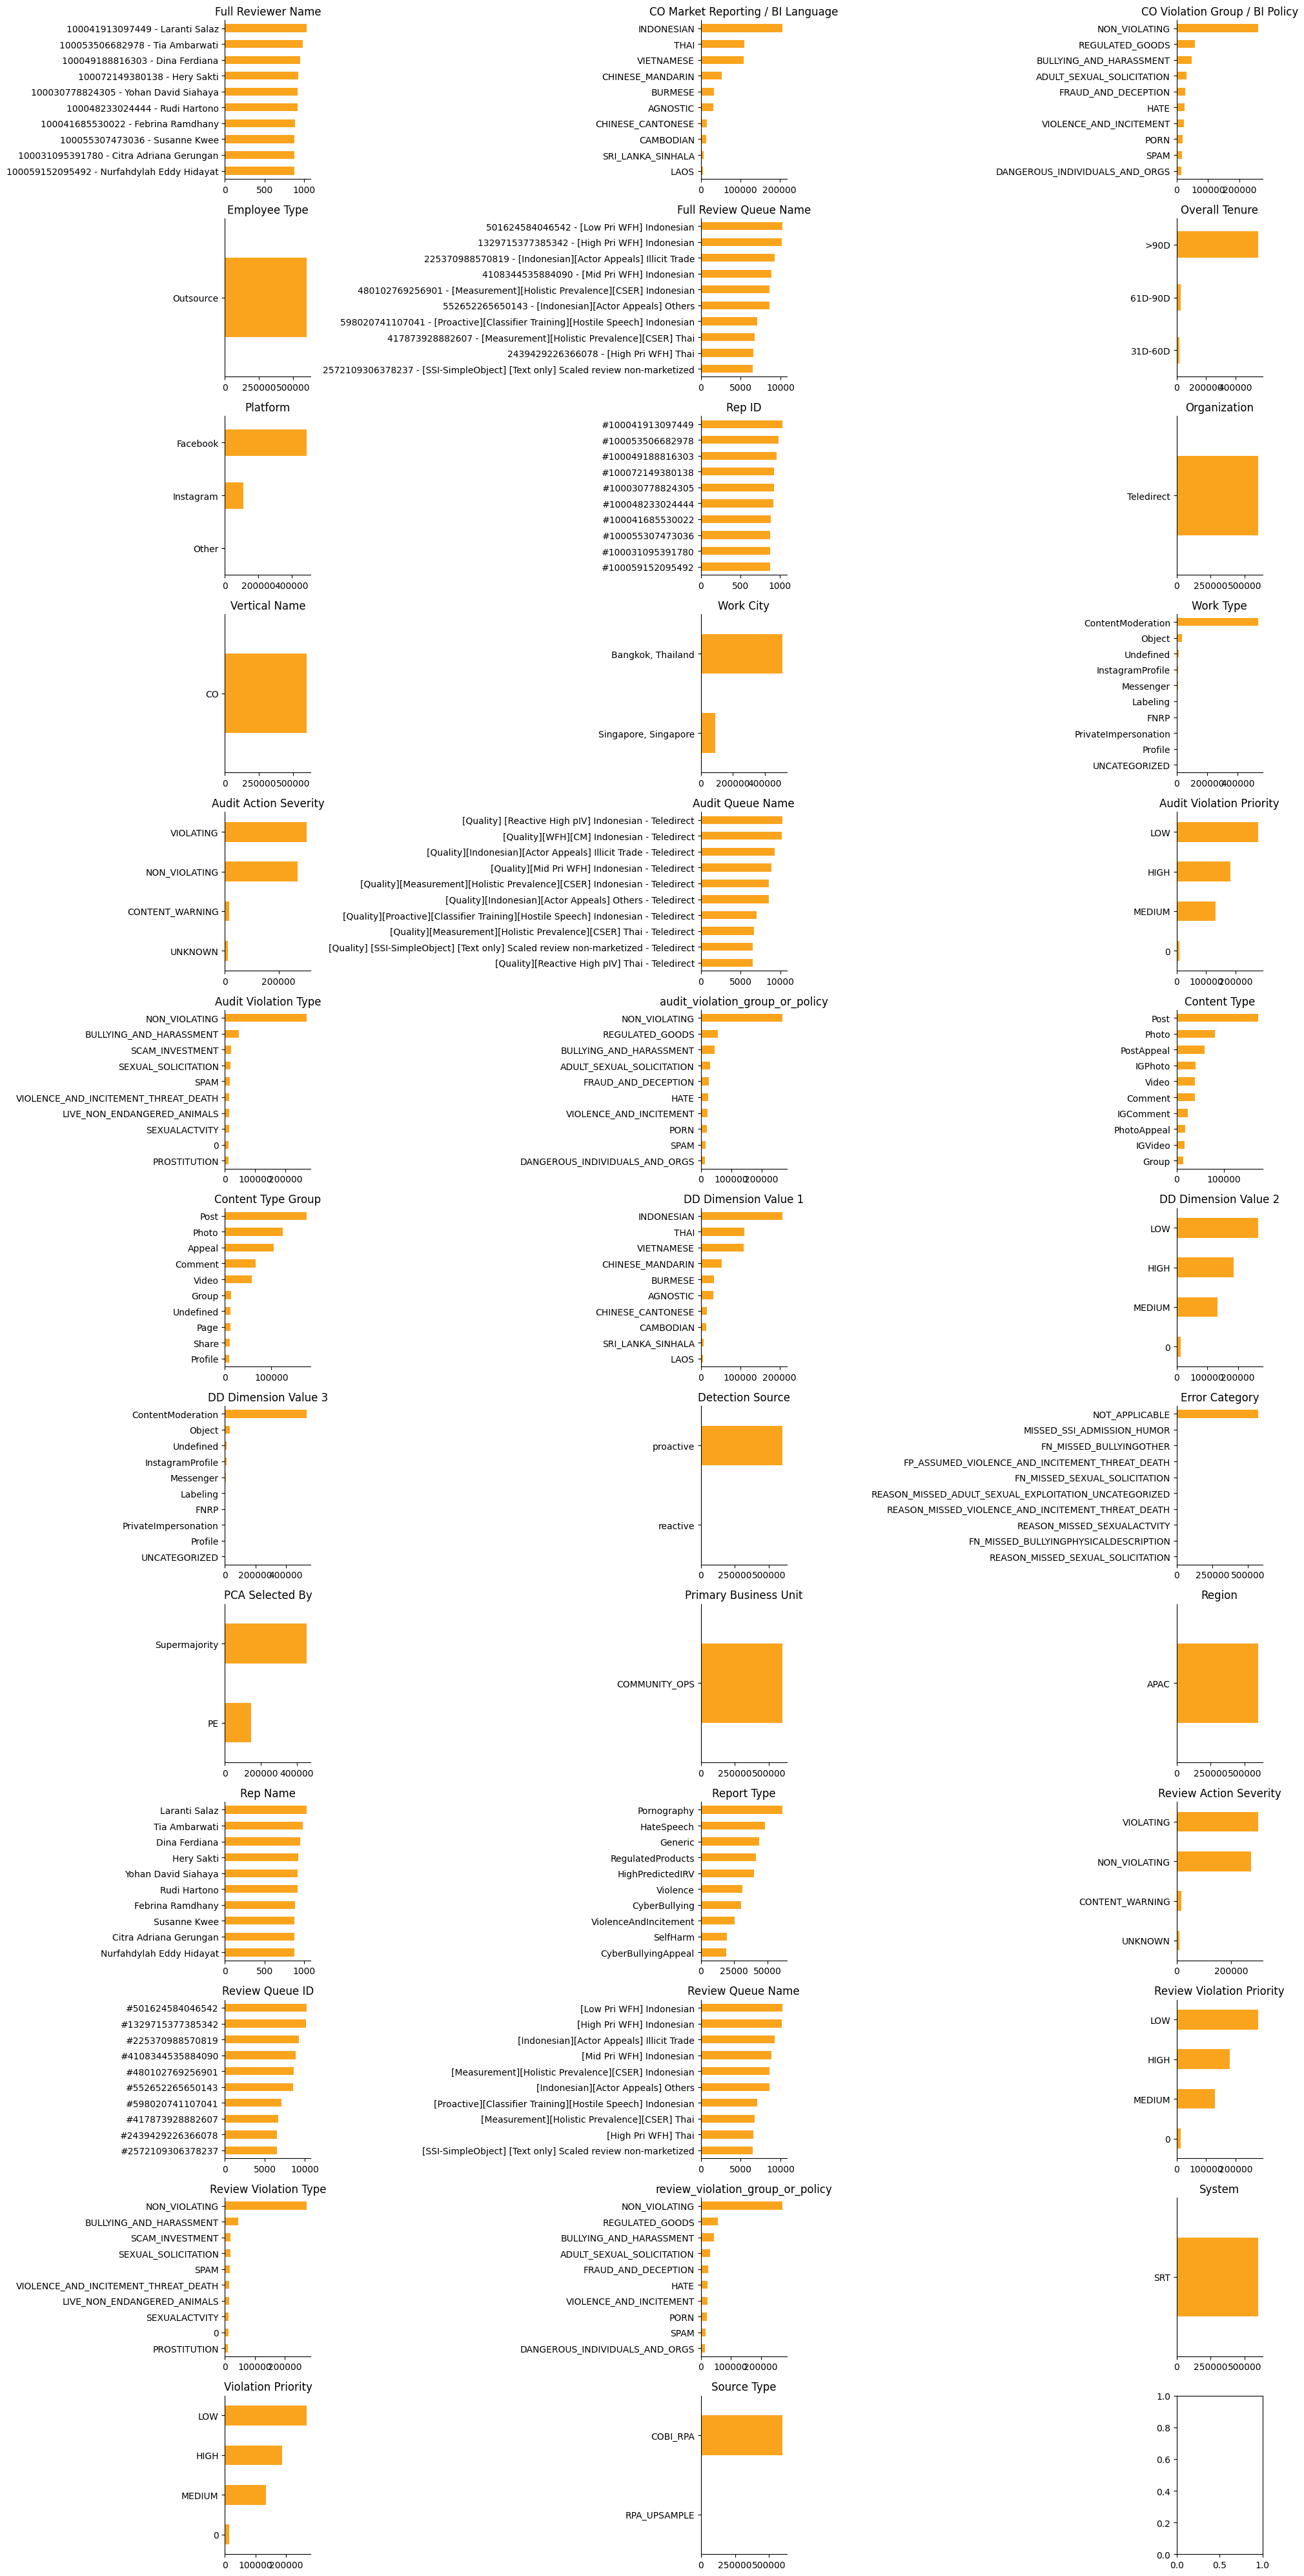

In [109]:
display(HTML('<center><b>Categorical Features</b></center>'))

dtypes = df_rpa.dtypes
cat_cols = dtypes[dtypes.isin(['object'])].index.tolist()
cat_cols

fig, ax = plt.subplots(13, 3, figsize=(20, 40))
ax = ax.flatten()

for idx, cat_col in enumerate(cat_cols):
    df_rpa[cat_col].value_counts()[:10][::-1].plot.barh(color=TDCX_COLORS[1],
                                                 ax=ax[idx])
    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].set_title(cat_col)

fig.tight_layout()

## Trends

In [110]:
dtypes = df_rpa.dtypes
date_cols = dtypes[dtypes.isin(['datetime64[ns]'])].index.tolist()

In [136]:
top_report_type = df_rpa['Report Type'].value_counts()[:10].index.tolist()
df_report_trend = df_rpa[df_rpa['Report Type'].isin(top_report_type)]
df_report_trend = df_report_trend.groupby(
    ['week_end_date', 'Report Type']).size().reset_index()

print('Min date: ', df_report_trend['week_end_date'].min())
print('Max date: ', df_report_trend['week_end_date'].max())

Min date:  2021-11-05 00:00:00
Max date:  2022-02-25 00:00:00


is there a trend per report types?